<h1>Assignment 1 (Part 2)</h1>

<h3>Assignment Instructions</h3>

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...`

<h3>Submission Instructions</h3>

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_2.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `RollNumber_PA1`

Please run the cell below to import all the necessary libraries that you would require for this part

In [312]:
# Initialize Otter
import otter
grader = otter.Notebook()

In [313]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Given the rise in obesity we are aware that there is a huge chance that a person may be affected by the heart disease. In this assignment we are going to explore a dataset which contains information about individuals heart rate and oxygen saturation. In this part we are going to analyze the data and generate sufficent results from it.

Please load the two csv files inside the variables `heartDf` & `o2SaturationDf` using a relative command respectively

In [314]:
#Please write your code below
heartDf = pd.read_csv("heart.csv")
o2SaturationDf = pd.read_csv("o2Saturation.csv")

Here we would print the first 5 rows of both the datasets so that we know what the data is like :

In [315]:
#Cell for visualizing the first 5 rows of the heart dataset
heartDf.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1


In [316]:
#Cell for visualizing the first 5 rows of the o2Saturation datset
o2SaturationDf.head(5)

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


Q1: Now, we will familirize us with both the datasets so please print the shapes of both the datsets in the cell below and assign them to `heartDfShape` & `o2DfShape` respectively.

In [317]:
#Use this markdown to get yourself familiriaze with the dataset
heartDfShape = heartDf.shape
o2DfShape = o2SaturationDf.shape

In [318]:
grader.check("Q1")

Q1 results: All test cases passed!

Q2: Now that we know the shapes of both the datsets check if null values are present in both the datsets by writing a relevant code snippet that would do the job for you. Store the null values if any in the variables `heartDfNull` & `o2DfNull` respectively.

In [319]:
#Please write your code below
heartDfNull = heartDf.isna().sum().sum()
o2DfNull = o2SaturationDf.isna().sum().sum()

In [320]:
grader.check("Q2")

Q2 results: All test cases passed!

Q3: Check both `heartDf` & `o2SaturationDf` for the presence of null values (missing values) and drop the rows by writing a valid code snippet below. 

In [321]:
# Please write your code below
heartDf = heartDf.dropna()
o2SaturationDf = o2SaturationDf.dropna()

In [322]:
grader.check("Q3")

Q3 results: All test cases passed!

Q4: Let us now, rename columns before we merge the both the dataset so that we can make more sense out of the data and comprehend it in a better way. The following column changes must be reflected in both the dataframes.
<h4>For Heart Dataset</h4>
<ul>
<li>exng -> exercise induced angina</li>
<li>caa -> # of major vessels</li>
<li>cp -> chest pain type </li>
<li>trtbps -> resting blood pressure</li>
<li>chol -> cholestrol levels</li>
<li>restecg -> resting electrocardiographic </li> 
<li>thalachh-> maximum heart rate</li>
<li>fbs-> fasting blood Pressure </li>
<li>oldpeak -> old peak </li>
</ul>
<h4>For O2 Saturation Dataset </h4>
<ul>
<li>98.6 -> O2 saturation</li>
</ul>

You also need to drop the columns named as `thall` & `slp`  inside the `heartDf` dataframe.

In [323]:
#Please write your code below
heartDf.rename(columns={
    "exng":"exercise induced angina",
    "caa":"number of major vessels",
    "cp":"chest pain type",
    "trtbps":"resting blood pressure",
    "chol":"cholestrol levels",
    "restecg":"resting electrocardiographic",
    "thalachh":"maximum heart rate",
    "fbs":"fasting blood sugar",
    "oldpeak":"old peak"
    }, inplace=True)

o2SaturationDf.rename(columns={"98.6":"O2 saturation"}, inplace=True)

heartDf.drop(["thall", "slp"], axis=1, inplace=True)

In [324]:
grader.check("Q4")

Q4 results: All test cases passed!

Q5: Peform a relevant form of a join so that we can better compare our results and reach an appropriate conclusion. Store the answer in `mergedDf` variable.

In [325]:
mergedDf = heartDf.merge(o2SaturationDf, left_index=True, right_index=True)
mergedDf

,age,sex,chest pain type,resting blood pressure,cholestrol levels,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,old peak,number of major vessels,output,O2 saturation
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,1,98.6
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,1,98.6
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,0,1,98.6
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,0,1,98.1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,0,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,0,0,97.5
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,0,0,97.5
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,2,0,97.5
301,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,0,97.5


In [326]:
grader.check("Q5")

Q5 results: All test cases passed!

Q6: Now let us start analysing data by first counting the number of individuals that fall into the following age groups:
<ul>
<li>Below 40 years of age</li>
<li>In the range of 40-50 years of age</li>
<li>In the range of 50-60 years of age</li>
<li>In the range of 60-70 years of age</li>
<li>70 or above years of age</li>
</ul>
<b>Note: </b> Only the lower bound is inclusive in the above age group range. You are to store the results in the variables given in the cell below.

In [327]:
#Store the variables in the same order as given above
belowForty = mergedDf[mergedDf["age"] < 40]
ageBtwRange1 = mergedDf[(mergedDf["age"] >= 40) & (mergedDf["age"] < 50)]
ageBtwRange2 = mergedDf[(mergedDf["age"] >= 50) & (mergedDf["age"] < 60)]
ageBtwRange3 = mergedDf[(mergedDf["age"] >= 60) & (mergedDf["age"] < 70)]
aboveSeventy = mergedDf[mergedDf["age"] >= 70]

In [328]:
grader.check("Q6")

Q6 results: All test cases passed!

Q7: Is the average resting blood pressure of individuals in the (Above 70 age group) greater or smaller than the resting blood pressure of inviduals that are below 40 years old ? <br/>
Store the result in `meanOfAboveSeventy` & `meanOfBelowForty` variables. <br/> Also the variable `q7Answer` must contain a string such as a 'Yes' or 'No' as the test cases check for it. <br>
<b>Note: </b>You are not allowed to use the mean() method but rather calculate the mean mathematically.

In [329]:
#Please write your code below
meanOfAboveSeventy = aboveSeventy["resting blood pressure"].sum() / aboveSeventy["resting blood pressure"].shape[0]
meanOfBelowForty = belowForty["resting blood pressure"].sum() / belowForty["resting blood pressure"].shape[0]
q7Answer = "Yes"
if meanOfAboveSeventy < meanOfBelowForty:
    q7Answer = "No"

In [330]:
grader.check("Q7")

Q7 results: All test cases passed!

Q8: What is the most occuring value for oxygen saturation in individuals that fall into the age group of 50-60 ? <br>
Store the value in the variable `frequentO2Saturation`.

In [331]:
#Please write your code below
frequentO2Saturation = ageBtwRange2["O2 saturation"].mode()[0]
frequentO2Saturation

97.5

In [332]:
grader.check("Q8")

Q8 results: All test cases passed!

Q9: Can you specify which type of chest pain is observed by most people who are in the age group of 50-60? <br>So if the most observed chest pain turns out to be `1` then your final variable `mostObservedChestPain` should contain the value `Atypical anigma` in this very case.
<ul>
<li>Value 0 -> Typical anigma</li>
<li>Value 1 -> Atypical anigma</li>
<li>Value 2 -> Non anigmal pain</li>
<li>Value 3 -> Asymptomatic</li> 
</ul>

In [333]:
#Please write your code below
mostObeservedChestPain = ageBtwRange2["chest pain type"].mode()[0]
pain_mappings = {0:"Typical anigma", 1:"Atypical anigma", 2:"Non anigmal pain", 3:"Asymptomatic"}
mostObeservedChestPain = pain_mappings[mostObeservedChestPain]

In [334]:
grader.check("Q9")

Q9 results: All test cases passed!

Q10: Calculate the <b>median</b> cholestrol levels for all the age groups and visualize the result by making use of a suitable visualization.<br>
<b>Note: </b> Here the variable `listOfDf` contains all the age groups that you have previously calculated in question <b>6</b>.

Text(0, 0.5, 'Median Cholestrol Level')

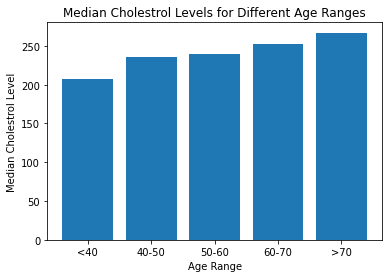

In [349]:
#Please write your code below
listOfDf = [belowForty, ageBtwRange1, ageBtwRange2, ageBtwRange3, aboveSeventy]
medianOfAllCholLevels = []
for group in listOfDf:
    group = group["cholestrol levels"]
    medianOfAllCholLevels.append(group.median())

labels = ["<40","40-50","50-60","60-70",">70"]
plt.bar(labels, medianOfAllCholLevels)
plt.title("Median Cholestrol Levels for Different Age Ranges")
plt.xlabel("Age Range")
plt.ylabel("Median Cholestrol Level")

In [336]:
grader.check("Q10")

Q10 results: All test cases passed!

Q11: Now let us explore the use of pivot tables, you are to construct a pivot table which would count the number of male and female individuals which are suffering from the various chest pains as mentioned above in one of the previous cells.
<br> Also you need to change the 0 and 1s in the `sex` column to `Female` and `Male` respectively

In [337]:
#Please write your code below
pivotTableDf = mergedDf
pivotTableDf["sex"] = pivotTableDf["sex"].replace([0,1], ["Female", "Male"])
pivotTable = pivotTableDf.pivot_table(
    index="chest pain type",
    columns="sex",
    values="output",
    aggfunc = "count"
)
pivotTable

sex,Female,Male
chest pain type,,
0,39,104
1,18,32
2,35,52
3,4,19


In [338]:
grader.check("Q11")

Q11 results: All test cases passed!

Q12: Using a suitable representation, represent the proportion of males and females who are diagnosed with exercise induced angina. <br/>
<b>Note:</b> 1 means they have exercise induced angina whereas 0 means they do not. 

In [339]:
#Please write your code below
exerciseInducedAnginaDf = mergedDf[mergedDf["exercise induced angina"] == 1]
q12Answer = exerciseInducedAnginaDf.groupby("sex").count()
q12Answer

,age,chest pain type,resting blood pressure,cholestrol levels,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,old peak,number of major vessels,output,O2 saturation
sex,,,,,,,,,,,,
Female,22,22,22,22,22,22,22,22,22,22,22,22
Male,77,77,77,77,77,77,77,77,77,77,77,77


In [340]:
grader.check("Q12")

Q12 results: All test cases passed!

Q13: Now we will replace the 0 and 1s in the `fasting blood sugar` column into "No" & "Yes" respectively. Write a code snippet in the cell below that does the job for you.

In [341]:
#Please write your code below
mergedDf["fasting blood sugar"] = mergedDf["fasting blood sugar"].replace([0,1], ["No", "Yes"])
mergedDf

,age,sex,chest pain type,resting blood pressure,cholestrol levels,fasting blood sugar,resting electrocardiographic,maximum heart rate,exercise induced angina,old peak,number of major vessels,output,O2 saturation
0,63,Male,3,145.0,233.0,Yes,0,150.0,0,2.3,0,1,98.6
1,37,Male,2,130.0,250.0,No,1,187.0,0,3.5,0,1,98.6
2,41,Female,1,130.0,204.0,No,0,172.0,0,1.4,0,1,98.6
3,56,Male,1,120.0,236.0,No,1,178.0,0,0.8,0,1,98.1
4,57,Female,0,120.0,354.0,No,1,163.0,1,0.6,0,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,0,140.0,241.0,No,1,123.0,1,0.2,0,0,97.5
299,45,Male,3,110.0,264.0,No,1,132.0,0,1.2,0,0,97.5
300,68,Male,0,144.0,193.0,Yes,1,141.0,0,3.4,2,0,97.5
301,57,Male,0,130.0,131.0,No,1,115.0,1,1.2,1,0,97.5


In [342]:
grader.check("Q13")

Q13 results: All test cases passed!

Q14: Did people who possess non anigmal pain (value -> 2) in their chest have greater chance of getting a heart attack to those who have an asymptotic (value -> 3) chest pain ?
<br/>
<b>Note: </b> Your Answer should be a simple 'Yes' or 'No' in form a string stored in the `q14Answer` variable.

In [343]:
nonAnginalPainDf = mergedDf[mergedDf["chest pain type"] == 2]
asymptomaticPainDf = mergedDf[mergedDf["chest pain type"] == 3]

# Since the question talks about chance, we must find the percentage of non-anginal pain individuals who got a heart attack out of all the non-anginal pain individuals

nonAnginalChance = nonAnginalPainDf[nonAnginalPainDf["output"] == 1].shape[0] / nonAnginalPainDf["output"].shape[0]
asymptomaticChance = asymptomaticPainDf[asymptomaticPainDf["output"] == 1].shape[0] / asymptomaticPainDf["output"].shape[0]

q14Answer = "No"
if nonAnginalChance > asymptomaticChance:
    q14Answer = "Yes"

In [344]:
grader.check("Q14")

Q14 results: All test cases passed!

Q15: What is the maximum heart rate across the different age groups ? 
Store the max heart rates obtained in the variable `heartRates`.
<br> Represent the maximum heart rates you obtain using a suitable plot. <br>
Do you notice a trend in the maximum heart rate please give a valid justification for the trend that you observe ?

Text(0, 0.5, 'Max Heart Rates')

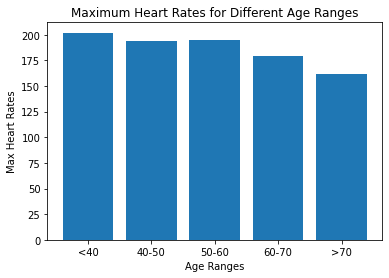

In [350]:
#Please write your code below
heartRates = []
for group in listOfDf:
    heartRates.append(group["maximum heart rate"].max())

plt.bar(labels, heartRates)
plt.title("Maximum Heart Rates for Different Age Ranges")
plt.xlabel("Age Ranges")
plt.ylabel("Max Heart Rates")

# Yes, I notice a trend in the max heart rates: they're decreasing as the patients' ages increase. This is evident from the height of the bars for the different age ranges. Every bar is shorter in height than it's preceeding bar which means the max heart rates are decreasing.

In [346]:
grader.check("Q15")

Q15 results: All test cases passed!

Q16: How many people have the oxygen saturation and cholestrol values greater than the threshold values given below ? Store it in the variable `numberOfPeople`. 
<br>
Do you think people with such levels of O2 saturation and cholestrol have a higher probability of getting an heart attack ? Justify this claim by providing a valid reason.

In [347]:
#The threshold values are given below
o2Threshold = 98
cholThreshold = 200

thresholdDf = mergedDf.loc[(mergedDf["O2 saturation"] >= o2Threshold) & (mergedDf["cholestrol levels"] >= cholThreshold)]
numberOfPeople = thresholdDf.shape[0]

# probability is the proportion of people that got a heart attack with oxygen saturation and cholestrol values greater than or equal to the threshold values
probability = thresholdDf[thresholdDf["output"] == 1].shape[0] / mergedDf[mergedDf["output"] == 1].shape[0]

lessThanThresholdDf = mergedDf.loc[(mergedDf["O2 saturation"] < o2Threshold) & (mergedDf["cholestrol levels"] < cholThreshold)]
# probabilityLessThan is the proportion of people that got a heart attack with oxygen saturation and cholestrol values less than the threshold values
probabilityLessThan = lessThanThresholdDf[lessThanThresholdDf["output"] == 1].shape[0] / mergedDf[mergedDf["output"] == 1].shape[0]

# The meaning of probability and probabilityLessThan is explained above. Since probability < probabilityLessThan (0.09 < 0.176), the people with levels of O2 saturation and cholestrol above the threshold make up fewer people that got heart attacks than the people below the threshold. So, levels of O2 saturation and cholestrol above the threshold do not have a higher probability of getting a heart attack.

In [348]:
grader.check("Q16")

Q16 results: All test cases passed!

This marks the end of Assignment 1 Part 2 :) <br>
Hooray! You made it to the end now give your self a pat on the back!